In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

print('Pandas version    : {}'.format(pd.__version__))
print('Numpy version    : {}'.format(np.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Seaborn version   : {}'.format(sns.__version__))

path = '../data/'

Pandas version    : 0.20.1
Numpy version    : 1.12.1
Matplotlib version: 2.0.2
Seaborn version   : 0.7.1


In [10]:
profiles = pd.read_csv(path + 'surgeapp_profiles.csv')
swipes = pd.read_csv(path + 'surgeapp_swipes_agg.csv')

df = pd.merge(profiles, swipes, left_on='account_id', right_on='accountid', how='inner')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 6069
Data columns (total 56 columns):
account_id                       6070 non-null int64
seen                             6070 non-null object
birthday                         6070 non-null object
public_photos                    5009 non-null object
private_photos                   969 non-null object
weight                           3188 non-null float64
height                           3539 non-null float64
relationship_status              3200 non-null object
looking_for                      3491 non-null object
about                            2690 non-null object
private_mode                     6070 non-null int64
favorite_position                6070 non-null object
transgender                      6070 non-null int64
interests_enabled                6070 non-null object
photo_verification_status        1587 non-null object
photo_verification_data          1587 non-null object
favorite_song                  

In [38]:
a
import pandas_profiling

pandas_profiling.ProfileReport(df)

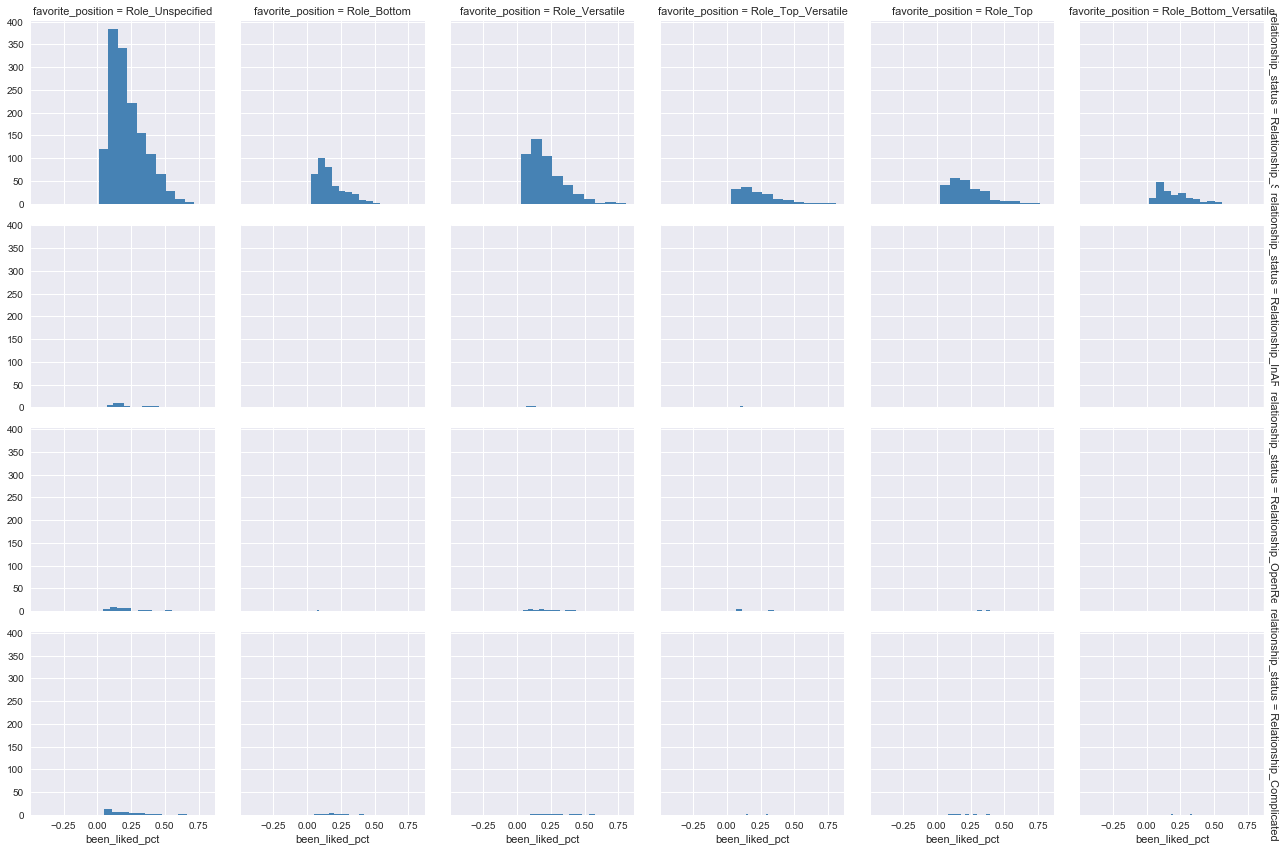

In [4]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df[df.been_swiped > 50], row="relationship_status", col="favorite_position", margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, "been_liked_pct", color="steelblue", lw=0) #bins=bins, lw=0)

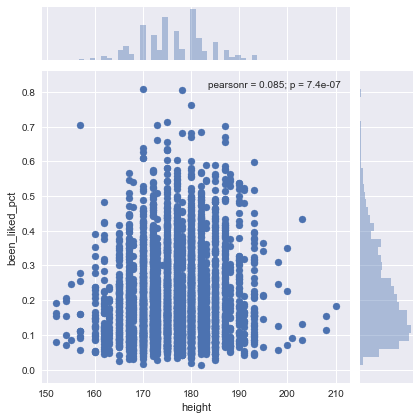

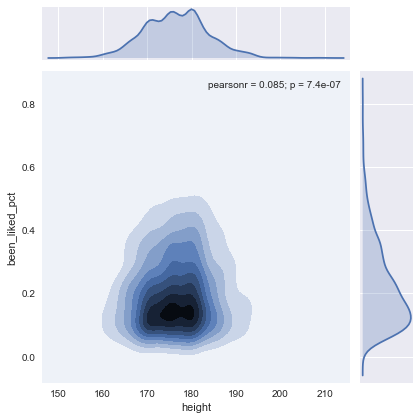

In [24]:
hrange = (df.height > 150) & (df.height < 215)
min50 = df.been_swiped > 50
sns.jointplot(x="height", y="been_liked_pct", data=df[hrange & min50]);
plt.show()
sns.jointplot(x="height", y="been_liked_pct", data=df[hrange & min50], kind='kde');

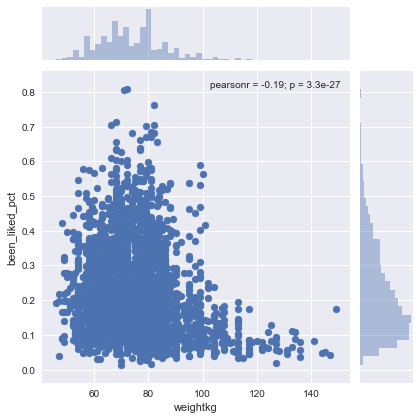

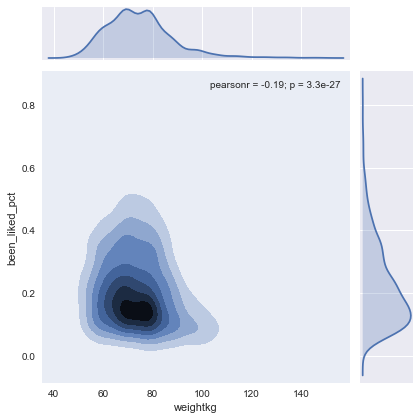

In [23]:
wrange = (df.weightkg > 45) & (df.weightkg < 150)
sns.jointplot(x="weightkg", y="been_liked_pct", data=df[wrange & min50]);
plt.show()
sns.jointplot(x="weightkg", y="been_liked_pct", data=df[wrange & min50], kind='kde');

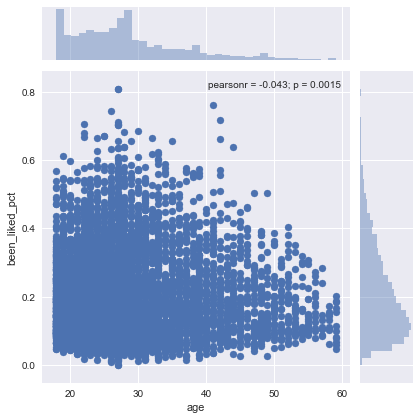

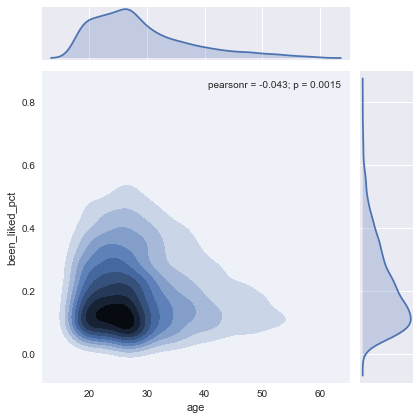

In [27]:
arange = (df.age > 16) & (df.age < 60)
sns.jointplot(x="age", y="been_liked_pct", data=df[arange & min50]);
plt.show()
sns.jointplot(x="age", y="been_liked_pct", data=df[arange & min50], kind='kde');

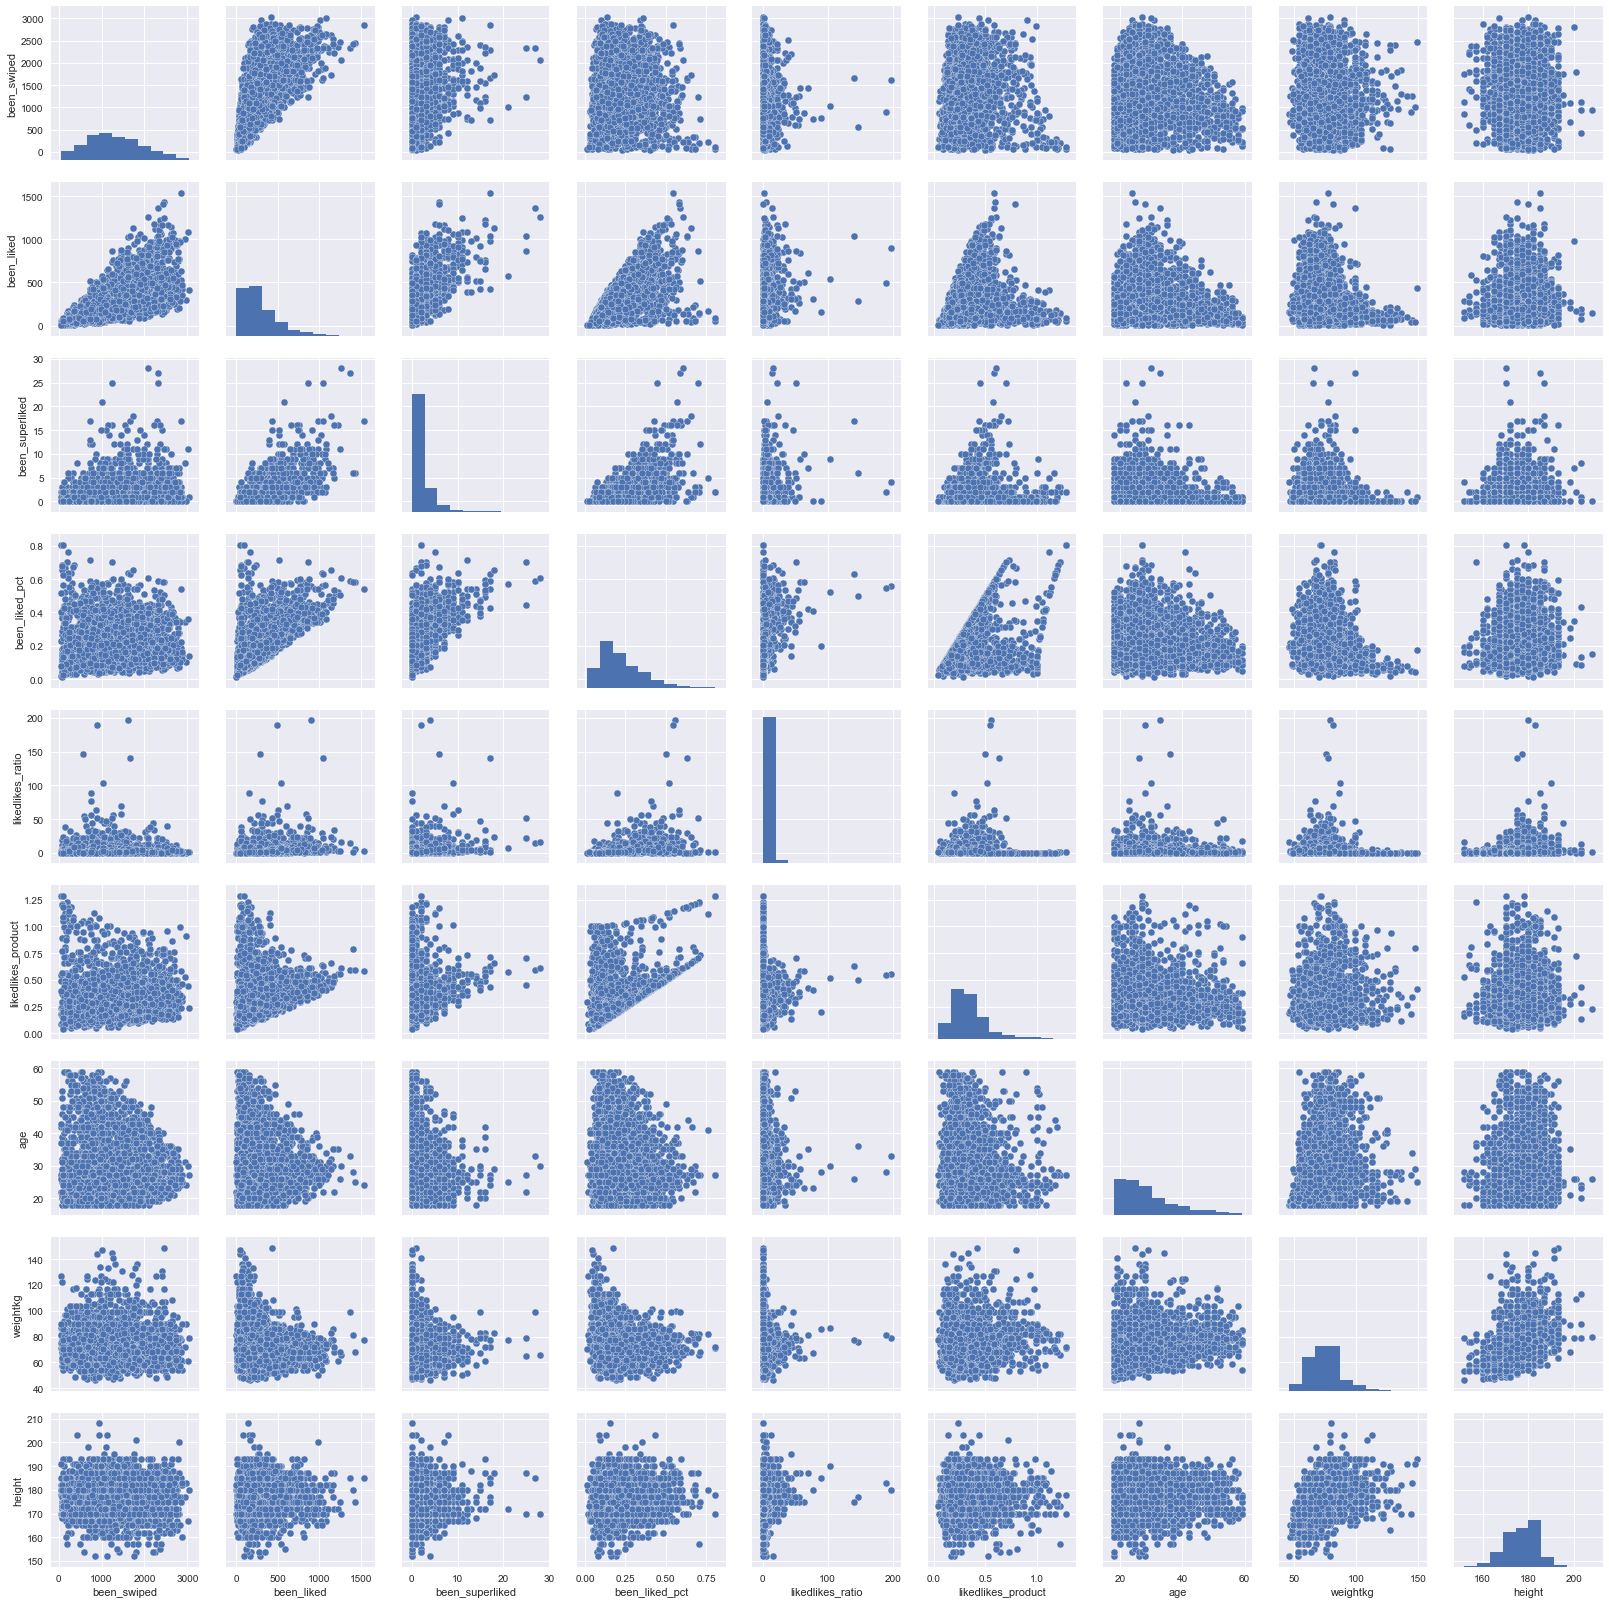

In [14]:
cols = ['been_swiped', 'been_liked', 'been_superliked', 'been_liked_pct', 'likedlikes_ratio', 'likedlikes_product', \
        'age', 'weightkg', 'height']
sns.pairplot(df[min50 & arange & wrange & hrange][cols].dropna());

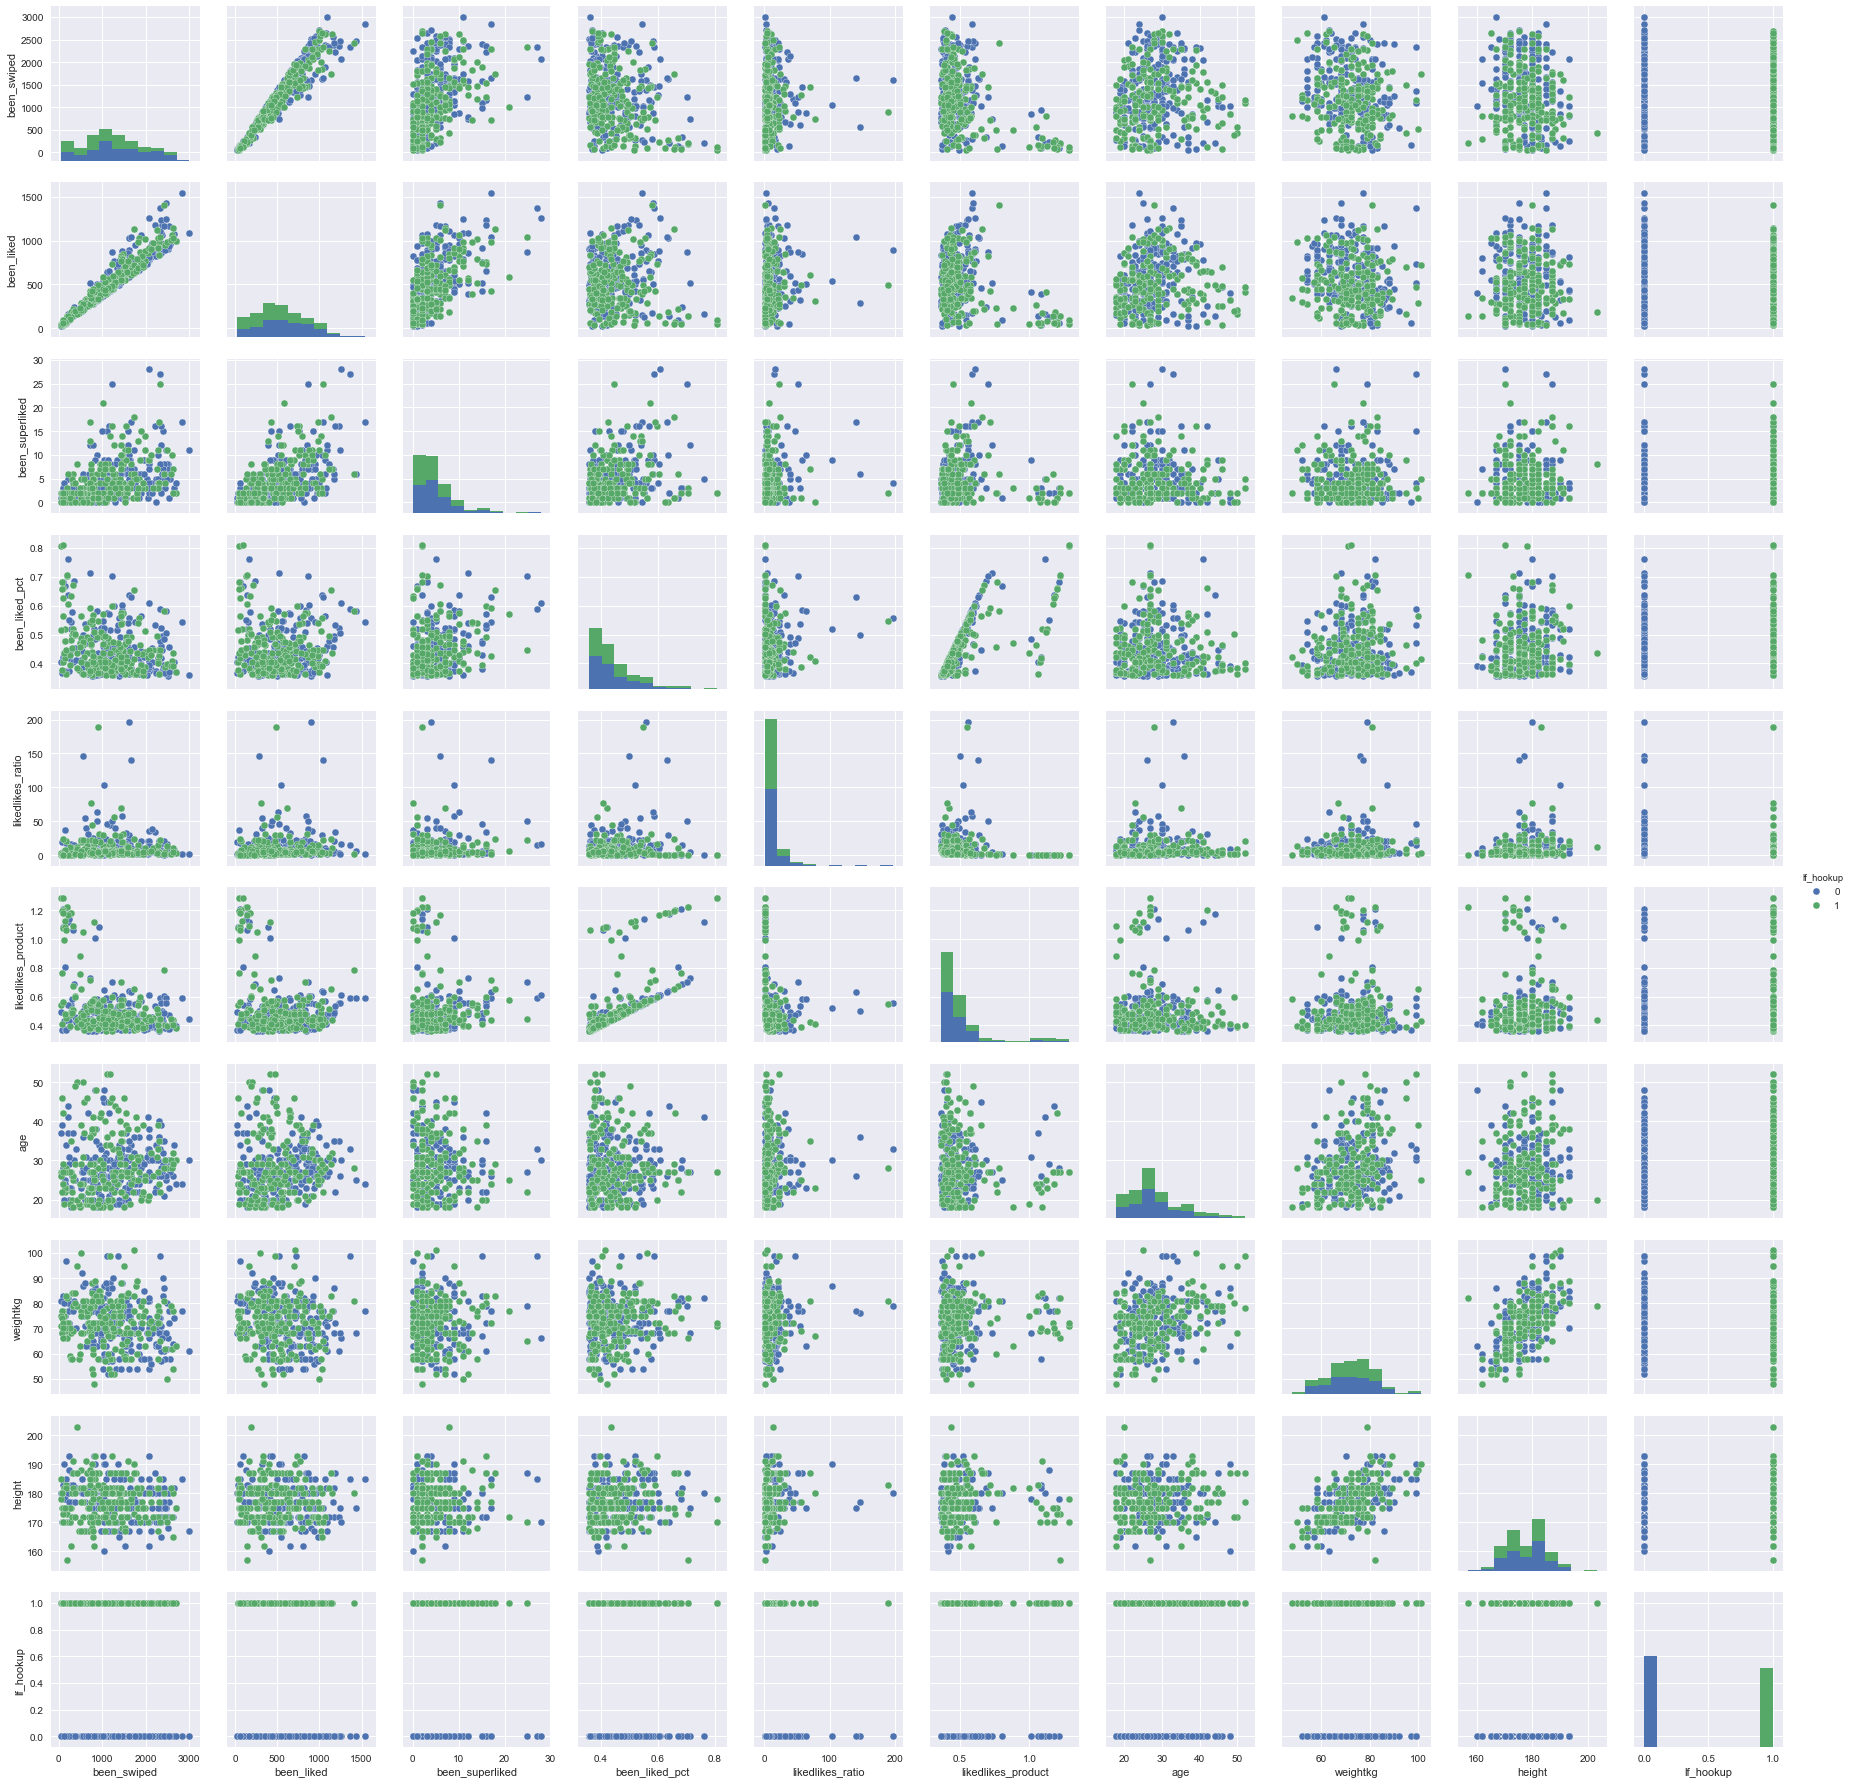

In [32]:
pop = df.been_liked_pct > (df.been_liked_pct.mean() + df.been_liked_pct.std())
sns.pairplot(df[pop & min50 & arange & wrange & hrange][cols + ['lf_hookup']].dropna(), hue='lf_hookup');

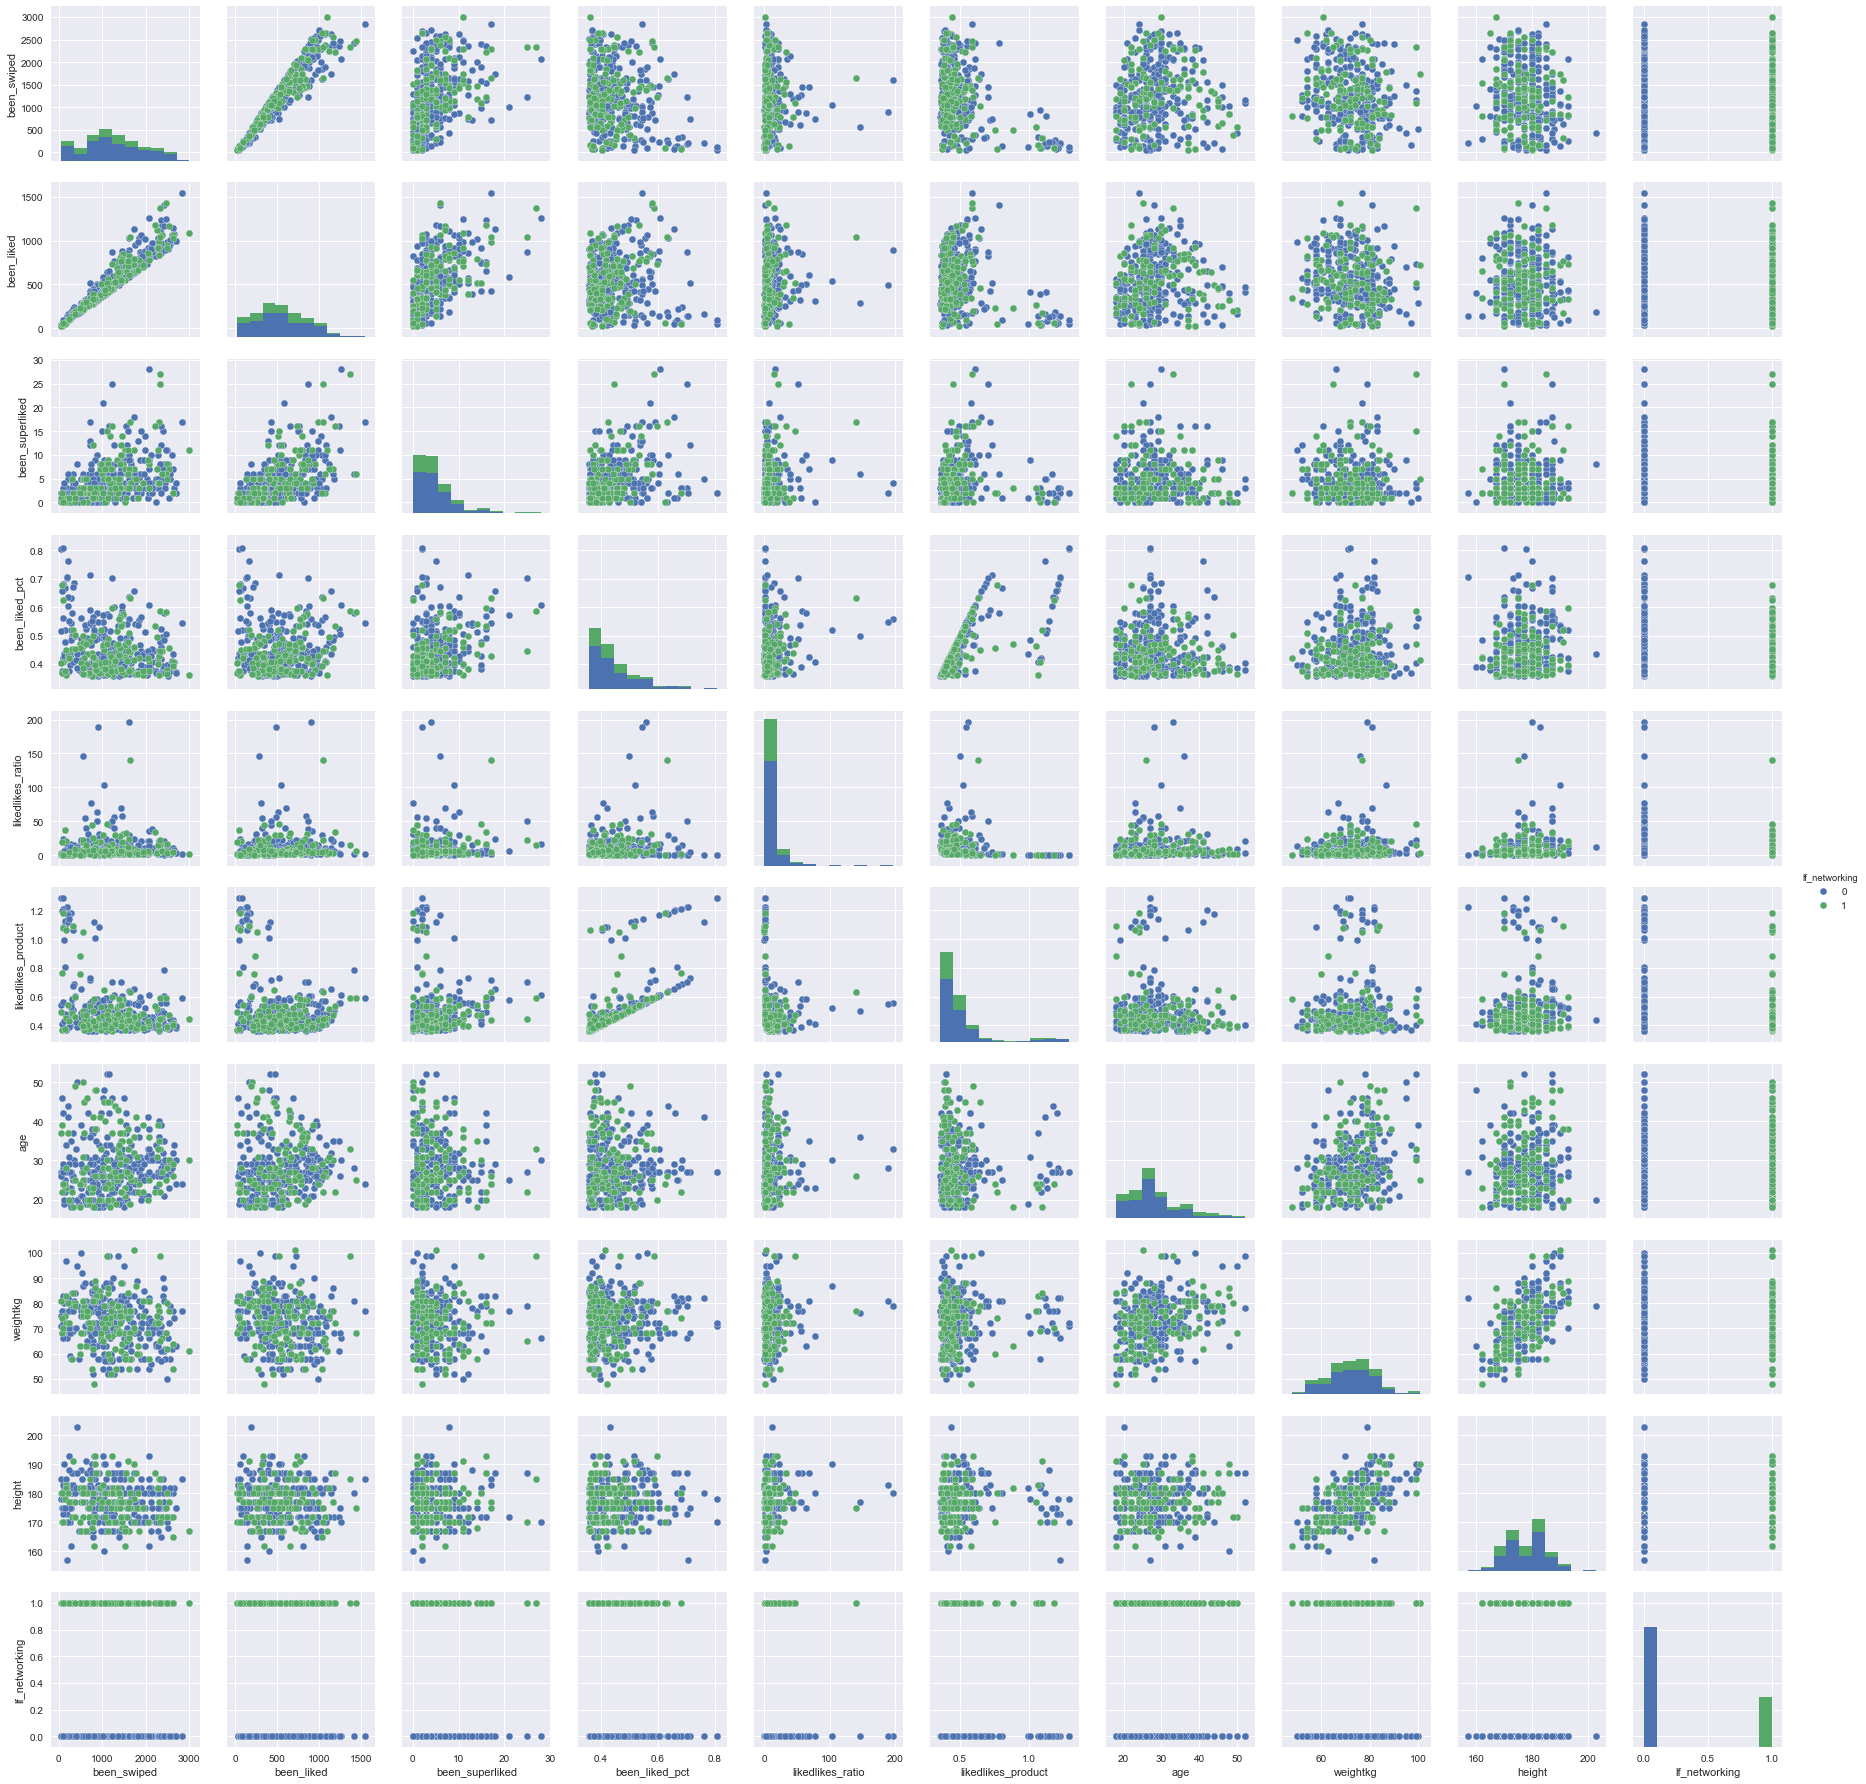

In [33]:
sns.pairplot(df[pop & min50 & arange & wrange & hrange][cols + ['lf_networking']].dropna(), hue='lf_networking');

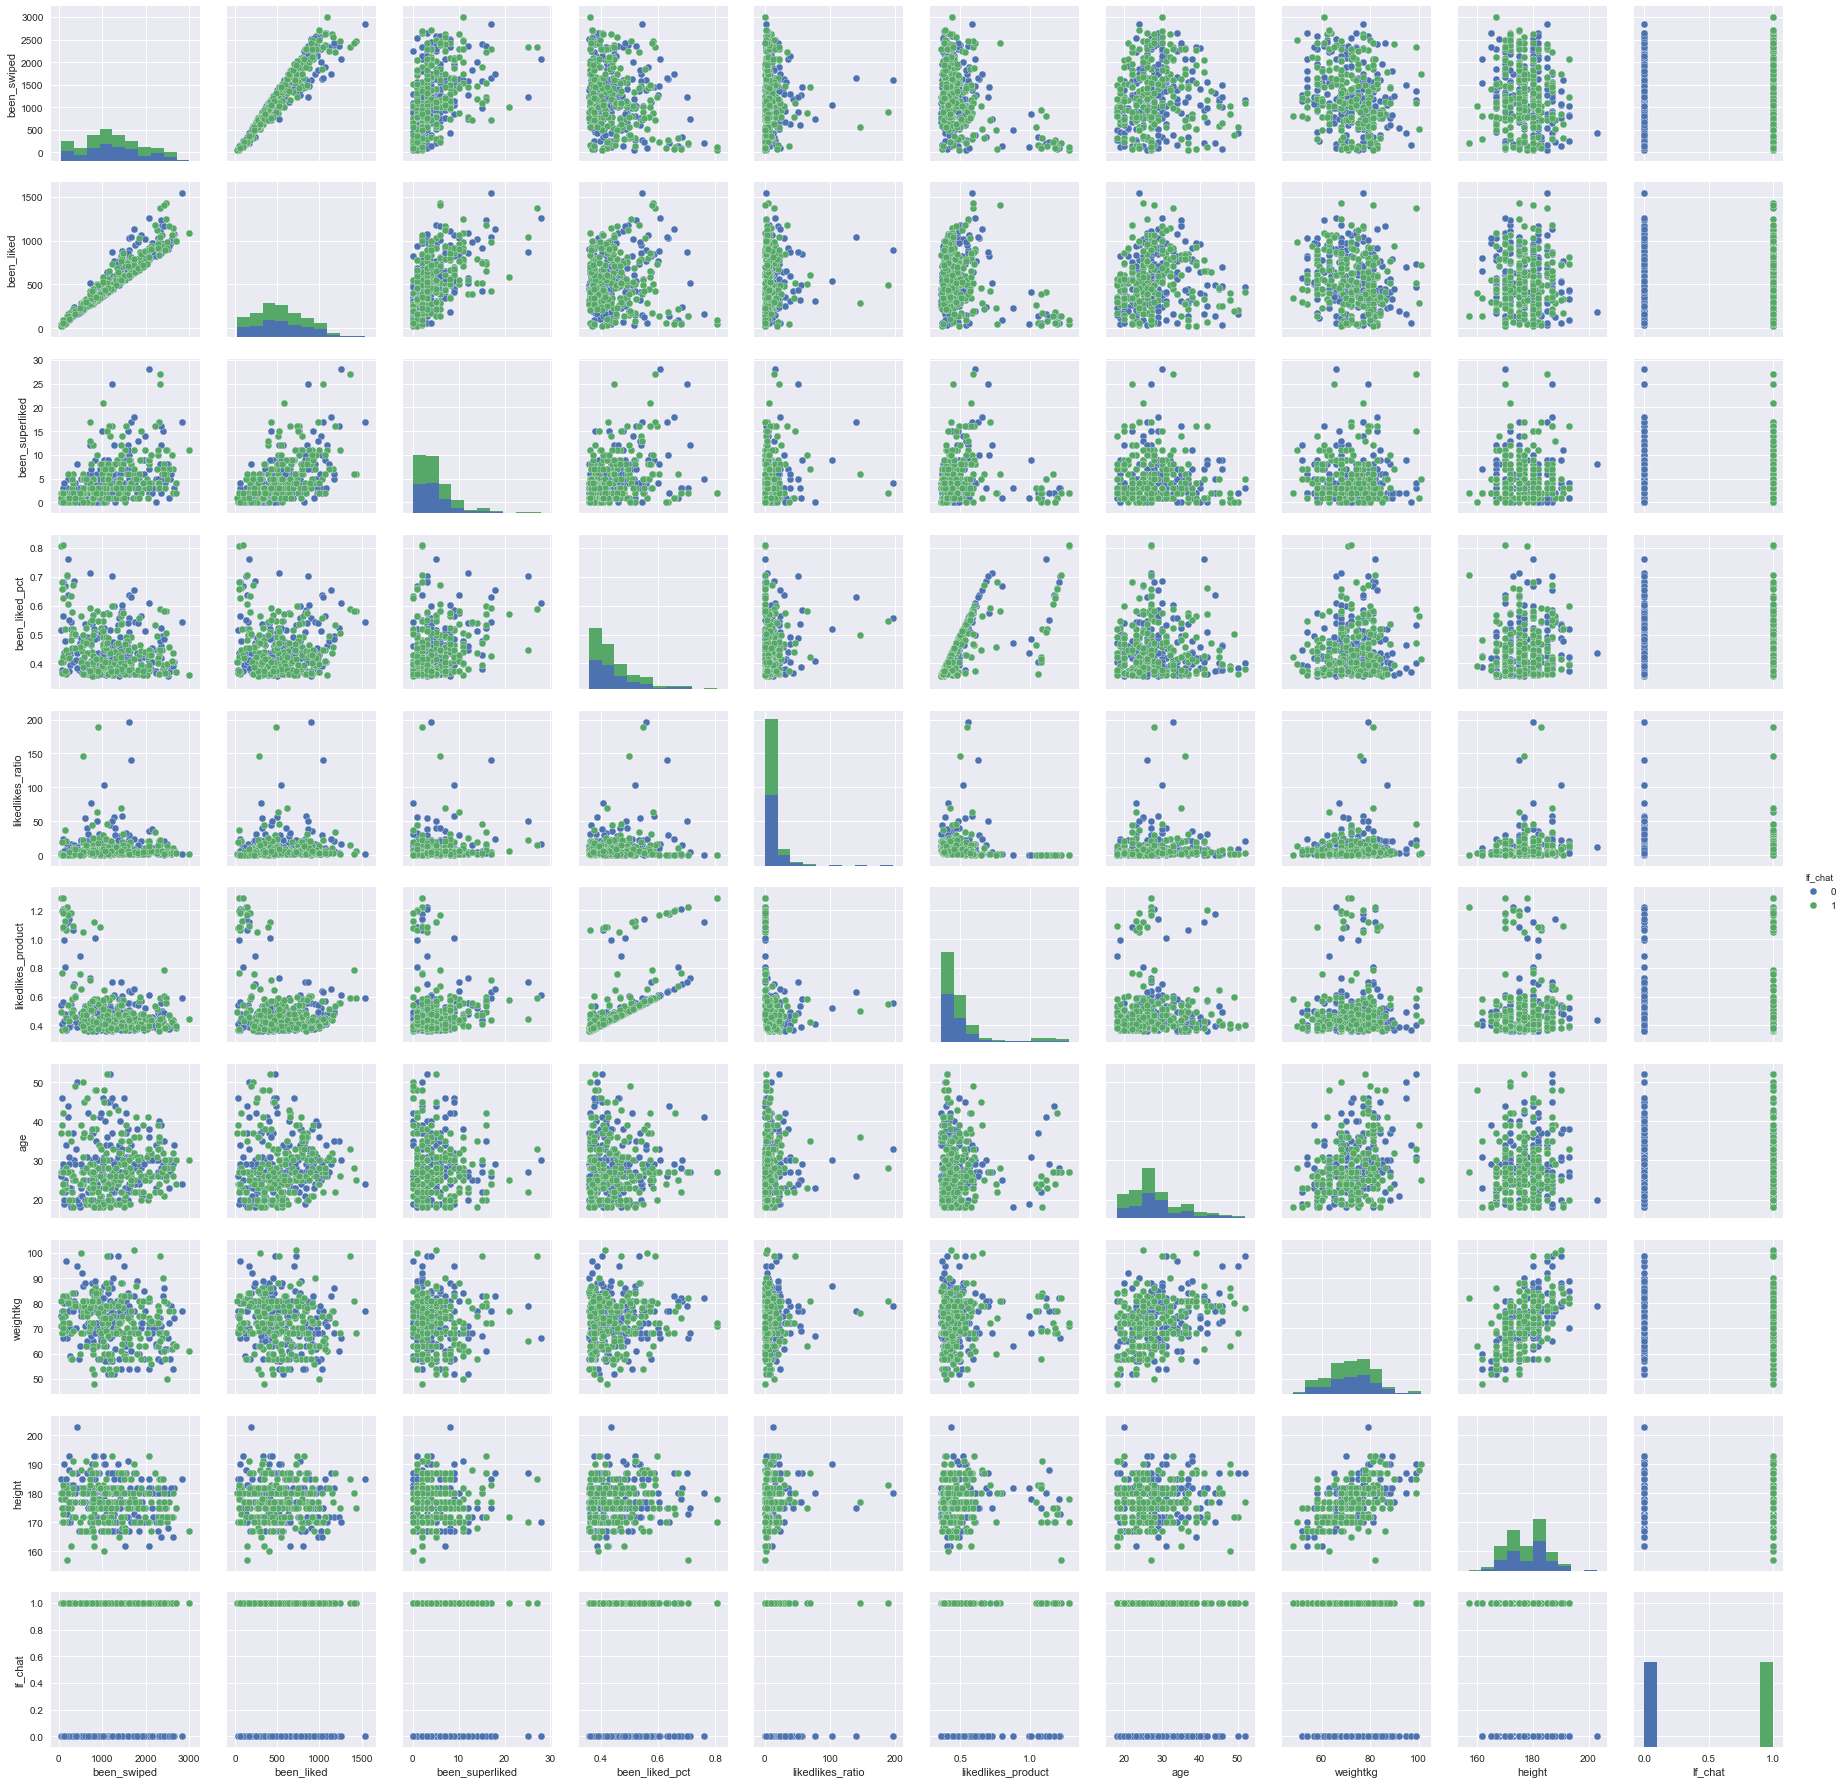

In [34]:
sns.pairplot(df[pop & min50 & arange & wrange & hrange][cols + ['lf_chat']].dropna(), hue='lf_chat');